In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
plt.rcParams.update({'font.size': 16})
import torch
import numpy as np
import networkx as nx
import os

In [4]:
# Density Data
results_dir2 = "../results/2021-09-04_20-28_dist_online_dense_v1"
results1 = torch.load(os.path.join(results_dir2, "cadmm_log_results.pt"), map_location=torch.device("cpu"))
results2 = torch.load(os.path.join(results_dir2, "dsgt_results.pt"), map_location=torch.device("cpu"))
results3 = torch.load(os.path.join(results_dir2, "dsgd_results.pt"), map_location=torch.device("cpu"))

In [9]:
# MNIST Data
r3_dir = "../results/2021-09-07_20-11_dist_mnist_random3"
r3_cadmm = torch.load(os.path.join(r3_dir, "cadmm_results.pt"), map_location=torch.device("cpu")) 
r3_dsgt = torch.load(os.path.join(r3_dir, "dsgt_results.pt"), map_location=torch.device("cpu"))
r3_dsgd = torch.load(os.path.join(r3_dir, "dsgd_results.pt"), map_location=torch.device("cpu"))

In [13]:
# RL Data
times_cadmm = np.load('../RL/dist_rl/trained/timesteps_cadmm_40.npy')
agree_cadmm = np.load('../RL/dist_rl/trained/agreements_cadmm_40.npz')
l_cadmm = int(3.*times_cadmm.shape[0] / 4.0)

# Load DSGT
times_dsgt = np.load('../RL/dist_rl/trained/timesteps_dsgt_7.npy')
agree_dsgt = np.load('../RL/dist_rl/trained/agreements_dsgt_7.npz')

# Load DSGD
times_dsgd = np.load('../RL/dist_rl/trained/timesteps_dsgd_7.npy')
agree_dsgd = np.load('../RL/dist_rl/trained/agreements_dsgd_7.npz')



In [7]:
cadmm_color = "darkorange"
dsgt_color = "limegreen"
dsgd_color = "purple"

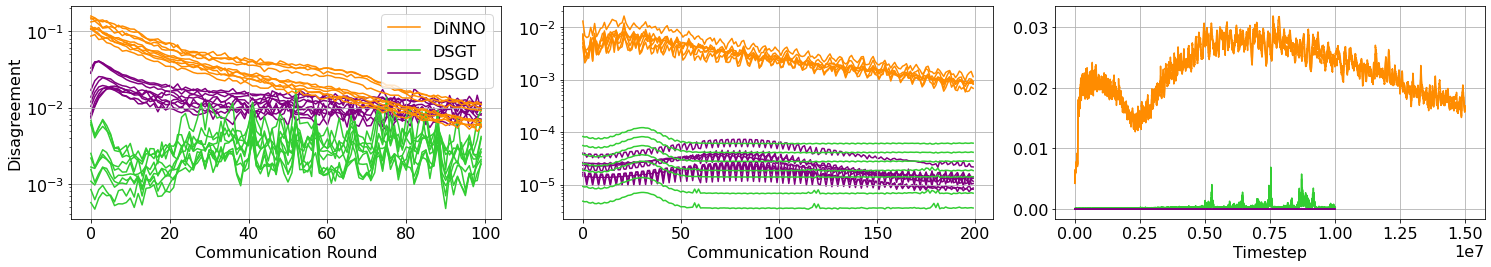

In [18]:
(fig, axs) = plt.subplots(ncols=3, figsize=(21, 4), tight_layout=True)

# Density
ag_cadmm = torch.vstack([v[1].reshape(1, -1) for v in results1["consensus_error"]])
ag_dsgt = torch.vstack([v[1].reshape(1, -1) for v in results2["consensus_error"]])
ag_dsgd = torch.vstack([v[1].reshape(1, -1) for v in results3["consensus_error"]])

axs[1].plot(ag_cadmm[1:, :6], c=cadmm_color, zorder=3)
axs[1].plot(ag_cadmm[1:, 6], c=cadmm_color, label="DiNNO", zorder=3)

axs[1].plot(ag_dsgt[1:, :6], c=dsgt_color, zorder=2)
axs[1].plot(ag_dsgt[1:, 6], c=dsgt_color, label="DSGT", zorder=2)

axs[1].plot(ag_dsgd[1:, :6], c=dsgd_color, zorder=1)
axs[1].plot(ag_dsgd[1:, 6], c=dsgd_color, label="DSGD", zorder=1)

axs[1].set_yscale("log")
axs[1].grid()
axs[1].set_xlabel("Communication Round")
axs[1].set_title("Neural Implicit Mapping")

# MNIST
ag_cadmm = torch.vstack([v[1].reshape(1, -1) for v in r3_cadmm["consensus_error"]])
ag_dsgt = torch.vstack([v[1].reshape(1, -1) for v in r3_dsgt["consensus_error"]])
ag_dsgd = torch.vstack([v[1].reshape(1, -1) for v in r3_dsgd["consensus_error"]])

axs[0].plot(ag_cadmm[1:, :9], c=cadmm_color, zorder=3)
axs[0].plot(ag_cadmm[1:, 9], c=cadmm_color, label="DiNNO", zorder=3)

axs[0].plot(ag_dsgt[1:, :9], c=dsgt_color, zorder=2)
axs[0].plot(ag_dsgt[1:, 9], c=dsgt_color, label="DSGT", zorder=2)

axs[0].plot(ag_dsgd[1:, :9], c=dsgd_color, zorder=1)
axs[0].plot(ag_dsgd[1:, 9], c=dsgd_color, label="DSGD", zorder=1)

axs[0].set_yscale("log")
axs[0].grid()
axs[0].set_xlabel("Communication Round")
axs[0].legend(loc=1)
axs[0].set_ylabel("Disagreement")
axs[0].set_title("MNIST - Random 1")

# RL
axs[2].plot(times_cadmm[0:l_cadmm], agree_cadmm['agree_0'][0:l_cadmm], c=cadmm_color, label="DiNNO")
axs[2].plot(times_cadmm[0:l_cadmm], agree_cadmm['agree_1'][0:l_cadmm], c=cadmm_color)
axs[2].plot(times_cadmm[0:l_cadmm], agree_cadmm['agree_2'][0:l_cadmm], c=cadmm_color)
axs[2].plot(times_dsgt, agree_dsgt['agree_0'], c=dsgt_color, label="DSGT")
axs[2].plot(times_dsgt, agree_dsgt['agree_1'], c=dsgt_color)
axs[2].plot(times_dsgt, agree_dsgt['agree_2'], c=dsgt_color)
axs[2].plot(times_dsgd, agree_dsgd['agree_0'], c=dsgd_color, label="DSGD")
axs[2].plot(times_dsgd, agree_dsgd['agree_1'], c=dsgd_color)
axs[2].plot(times_dsgd, agree_dsgd['agree_2'], c=dsgd_color)

axs[2].set_xlabel("Timestep")
axs[2].grid(zorder=0)
axs[2].set_title("Deep MARL")

fig.savefig("agg_all.svg")